<a href="https://colab.research.google.com/github/lucas-prado/data_science_portfolio/blob/main/Projeto_Analisando_os_Dados_do_Airbnb_(Amsterdam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados do Airbnb - *Amsterdam*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-09-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* **id:** número de cadastro do imóvel.
* **name**: nome do estabelecimento residencial.
* **host_id**: número de cadastro do anfitrião.
* **host_name**: nome do anfitrião.
* **neighbourhood_group**: não identificado.
* **neighbourhood**: localidade do imóvel.
* **latitude**: coordenada da latitude do imóvel.
* **longitude**: coordenada da longitude do imóvel.
* **room_type**: tipo do imóvel.
* **price**: preço da diária do aluguel.
* **minimum_nights**: quantidade mínima de tempo de hospedagem (nº de noites).
* **number_of_reviews**: número de reviews dados à hospedagem.
* **last_review**: data do último review.
* **reviews_per_month**: Nº de reviews por mês.
* **calculated_host_listings_count**: quantidade de imóveis do mesmo anfitrião.
* **availability_365**: número de dias de disponibilidade da residência.
* **number_of_reviews_ltm**: número de reviews da hospedagem nos últimos 12 meses. 


In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,280,2019-11-21,2.86,1,124,2,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.64,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-01-02,0.11,1,57,0,NaN
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,223,2021-08-21,2.14,1,66,4,0363 974D 4986 7411 88D8
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,353,2021-08-27,4.59,2,298,19,0363 607B EA74 0BD8 2F6F


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame.
print("-"*13+"FORMATO DA TABELA"+"-"*13)
print(f"linhas: {df.shape[0]}")
print(f"colunas: {df.shape[1]}")

# tipo das colunas.
print("-"*13+"TIPO DAS COLUNAS"+"-"*14)
df.dtypes

-------------FORMATO DA TABELA-------------
linhas: 16116
colunas: 18
-------------TIPO DAS COLUNAS--------------


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenando as variáveis em ordem decrescente por seus valores ausentes.

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.717362
reviews_per_month                 0.129499
last_review                       0.129499
name                              0.001862
host_name                         0.000310
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

In [6]:
#eliminando coluna com 100% e 72% de valores nulos.

df.drop(columns=["neighbourhood_group", "license"], inplace=True)

In [7]:
#preenchendo valores strings nulos.

df.fillna({"name": "N/D", "host_name":"N/D", "last_review":"N/D"}, inplace=True)

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.129499
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
last_review                       0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

In [8]:
#criando uma lista de colunas com valores numéricos para otimização de processos de análise.

column_values = []

for c in df.columns:
  if type(df[c][0]) == str or c in ["id", "host_id", 'latitude', 'longitude']:
    pass
  else:
    column_values.append(c)

### **Q3. Qual a distribuição das variáveis?** 

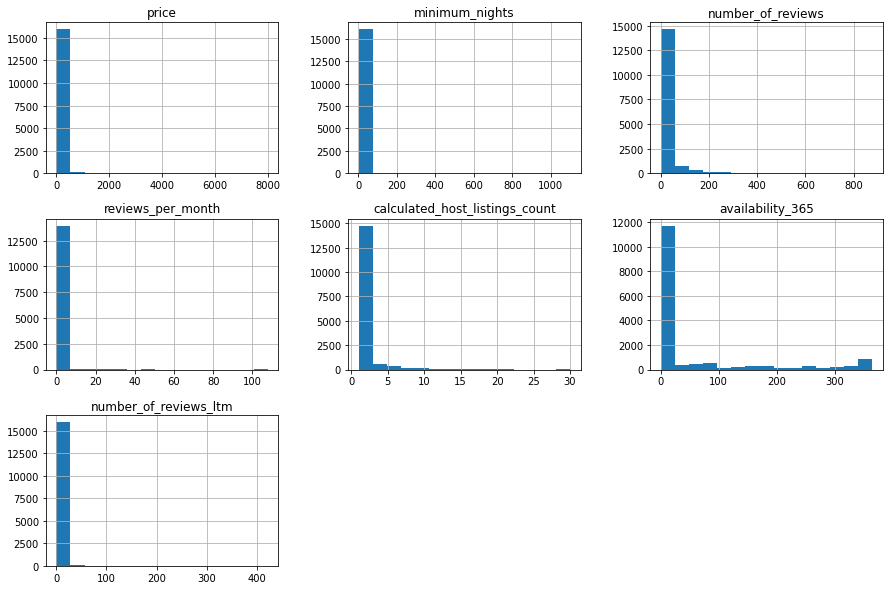

In [9]:
# plotando o histograma das variáveis numéricas.

df.hist(column=column_values, bins=15, figsize=(15,10));


### **Q4. TRATANDO OUTLIERS**

É possível perceber, tanto pela análise descritiva, quanto pelos histogramas e boxplots, a presença de inúmeros outliers. Para evidenciar a sua existência e possível eliminação, iremos pelo **método de Tukey**, calcular os outliers existentes nas variáveis, como evidenciado abaixo:

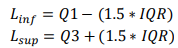

In [10]:
#análise descritiva das variáveis numéricas.

df[column_values].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16116.00,16116.00,16116.00,14029.00,16116.00,16116.00,16116.00
mean,156.91,3.99,24.65,0.68,1.64,55.32,1.39
std,173.42,20.99,56.71,1.72,2.40,107.91,7.48
min,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,96.00,2.00,2.00,0.11,1.00,0.00,0.00
50%,130.00,2.00,8.00,0.27,1.00,0.00,0.00
75%,180.00,3.00,22.00,0.62,1.00,47.00,0.00
max,8000.00,1100.00,877.00,107.84,30.00,365.00,422.00


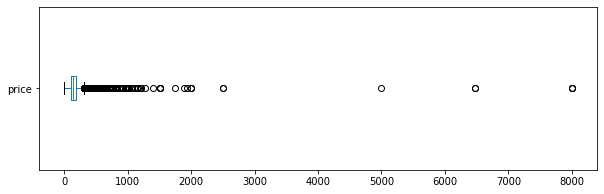

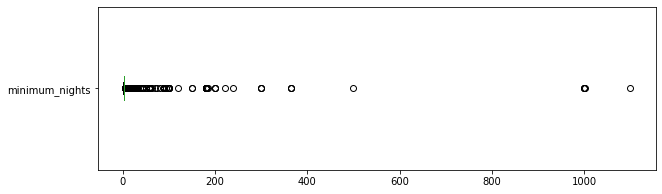

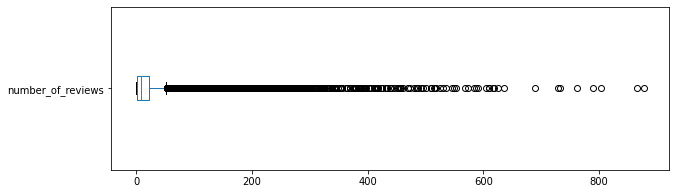

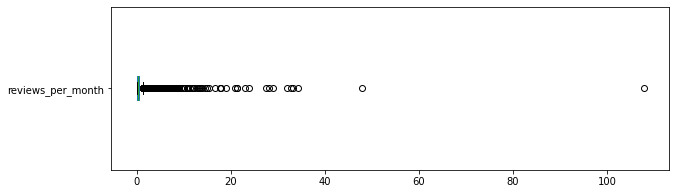

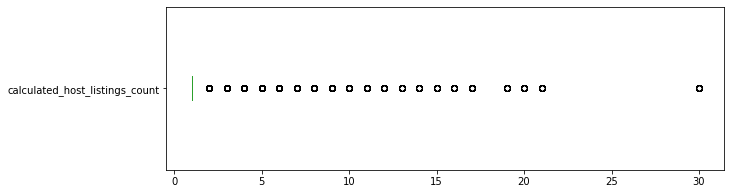

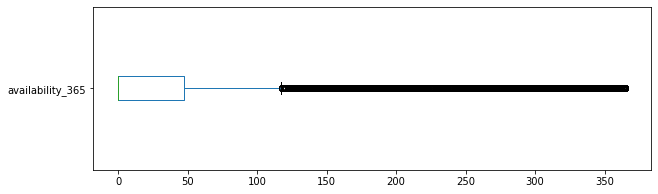

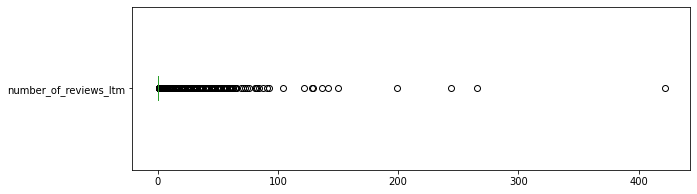

In [11]:
#boxplot das variáveis numéricas para identificação de outliers.

for c in column_values:
    df[c].plot(kind="box", vert=False, figsize=(10, 3));
    plt.show()

In [12]:
#calculando limites superiores e inferiores.

percentil = {}


for c in column_values:
  percentil[c] = list(df.describe()[c][['25%',"75%"]])
  percentil[c].append(percentil[c][0] - 1.5*(percentil[c][1] - percentil[c][0]))
  percentil[c].append(percentil[c][1] + 1.5*(percentil[c][1] - percentil[c][0]))

print(percentil)

{'price': [96.0, 180.0, -30.0, 306.0], 'minimum_nights': [2.0, 3.0, 0.5, 4.5], 'number_of_reviews': [2.0, 22.0, -28.0, 52.0], 'reviews_per_month': [0.11, 0.62, -0.655, 1.385], 'calculated_host_listings_count': [1.0, 1.0, 1.0, 1.0], 'availability_365': [0.0, 47.0, -70.5, 117.5], 'number_of_reviews_ltm': [0.0, 0.0, 0.0, 0.0]}


In [13]:
#criando dataframes para cada variável sem seus respectivos outliers e um dataframe sem outliers como um todo, 
#a fim de analisar a quantidade de valores extremos em relação ao nº de registros da base de dados.

df_clean = df.copy()

print("QUANTIDADE DE OUTLIERS")

for c in column_values:
  globals()[f"df_clean_{c}"] = df_clean.drop(df_clean[df_clean[c] > percentil[c][3]].index | df_clean[df_clean[c] < percentil[c][2]].index)
  print(f"{c}: ", end="")
  print(round((df.shape[0]-globals()[f"df_clean_{c}"].shape[0])/df.shape[0], 2))

for c in column_values:
  df_clean_full = df_clean.drop(df_clean[df_clean[c] > percentil[c][3]].index | df_clean[df_clean[c] < percentil[c][2]].index)
  df_clean = df_clean_full
  df_clean_full = df_clean_full.reset_index(drop=True)

print(f"full: {round((df.shape[0] - df_clean_full.shape[0])/df.shape[0], 2)}")

print("-"*13+"FORMATO DA NOVA TABELA"+"-"*13)
print(f"linhas: {df_clean_full.shape[0]}")
print(f"colunas: {df_clean_full.shape[1]}")
print("-"*13+"FORMATO DA TABELA ANTIGA"+"-"*13)
print(f"linhas: {df.shape[0]}")
print(f"colunas: {df.shape[1]}")

QUANTIDADE DE OUTLIERS
price: 0.05
minimum_nights: 0.14
number_of_reviews: 0.1
reviews_per_month: 0.1
calculated_host_listings_count: 0.19
availability_365: 0.18
number_of_reviews_ltm: 0.19
full: 0.51
-------------FORMATO DA NOVA TABELA-------------
linhas: 7941
colunas: 16
-------------FORMATO DA TABELA ANTIGA-------------
linhas: 16116
colunas: 16


### **Insights sobre os dados:**

Excluir todos os *outliers* faria com que fossem perdidos 51% da base de dados, um valor altamente considerável. É necessário, portanto, analisar com mais profundidade as exclusões:

* **price:** não é esperado que seja cobrado um preço de zero por locação, tão pouco um preço de 8.000 por diária. O limite superior (306.0) estabelecido para exclusão dos outliers também é razoável. **(excluir outliers)**;
* **minimum_nights:** não é esperado que exista um período de locação mínima de 1.100 dias. Os limites superior e inferior (4.5 e 0.5, respectivamente) estabelecido para exclusão dos outliers também são razoáveis. **(excluir outliers)**;
* **number_of_reviews:** é possível existir outliers em hospedagens registradas há mais tempo na base de dados do Airbnb que já passaram por mais tempo de locação e, portanto, recebendo mais reviews. **(não excluir outliers)**;
* **reviews_per_month:** o mínimo de noites de locação diária na base é de 1 dia. Se um imóvel for alugado em um mês inteiro de 31 dias, o máximo de reviews que é possível ter naquele período específico é, também, 31. Portanto, não faz sentido números maiores presentes na base. **(excluir outliers maiores que 31)**;
* **calculated_host_listings_count:** nas análises de estatísticas descritivas, apesar do número máximo registrado de imóveis para um anfitrião ser 30 e, portanto, muito improvável de ocorrer na realidade, percebe-se que o primeiro e terceiro quartil são iguais a 1 e, nesse caso, os limites superiores e inferiores também serão 1. Não é lógico eliminar todas as linhas do dataframe que sejam maiores do que 1, pois é razoável que um mesmo anfitrião tenha 2 ou mais imóveis registrados. **(não excluir outliers)**;
* **availability_365:** apesar de 365 dias de disponibilidade de um imóvel ser um número altamente improvável, ainda é possível a sua ocorrência, visto que estamos analisando um período de 365 dias. **(não excluir outliers)**;
* **number_of_reviews_ltm:** aplicando-se a mesma lógica da variável *number_of_reviews*, pode ser que exista a possibilidade de um outlier de reviews para imóveis registrados há mais tempo na plataforma. **(não excluir outliers)**.


In [14]:
#Eliminando os outliers em definitivo.

df_clean = df.copy()

#Tratando as colunas "price" e "minimum_nights".

for c in column_values:
  if c in str("price") or c in str("minimum_nights"):
    df_clean_full = df_clean.drop(df_clean[df_clean[c] > percentil[c][3]].index | df_clean[df_clean[c] < percentil[c][2]].index)
    df_clean = df_clean_full
    df_clean_full = df_clean_full.reset_index(drop=True)

df_clean_full = df_clean_full.drop(df_clean_full[df_clean_full["price"] == 0.0].index)

#Tratando a coluna "reviews_per_month".

df_clean_full = df_clean_full.drop(df_clean_full[df_clean_full["reviews_per_month"] > 31].index)

#Tendo agora a média de reviews_per_month sem outliers, podemos usar o fillna para esta coluna com a sua média.

df_clean_full.fillna({"reviews_per_month":df_clean_full.reviews_per_month.mean()}, inplace=True)

In [15]:
print("-"*13+"QUANTIDADE DE OUTLIERS"+"-"*13)

print(f"full: {round((df.shape[0] - df_clean_full.shape[0])/df.shape[0], 2)}")

print("-"*13+"FORMATO DA NOVA TABELA"+"-"*13)
print(f"linhas: {df_clean_full.shape[0]}")
print(f"colunas: {df_clean_full.shape[1]}")
print("-"*12+"FORMATO DA TABELA ANTIGA"+"-"*12)
print(f"linhas: {df.shape[0]}")
print(f"colunas: {df.shape[1]}")

-------------QUANTIDADE DE OUTLIERS-------------
full: 0.18
-------------FORMATO DA NOVA TABELA-------------
linhas: 13202
colunas: 16
------------FORMATO DA TABELA ANTIGA------------
linhas: 16116
colunas: 16


### **Q5. DISTRIBUIÇÕES E ANÁLISES DESCRITIVAS, APÓS TRATAMENTO DE OUTLIERS.**

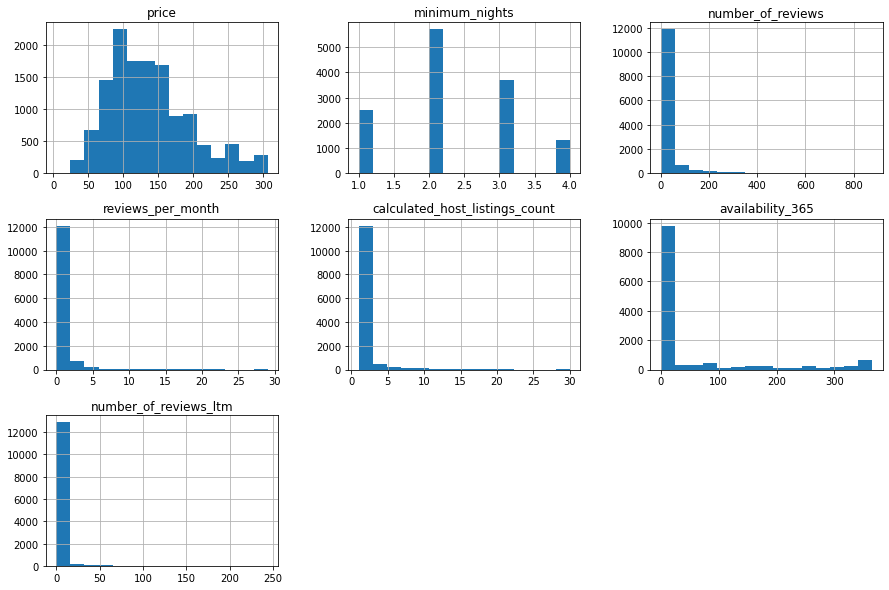

In [16]:
#histogramas após o tratamento dos outliers.

df_clean_full.hist(column=column_values, bins=15, figsize=(15,10));

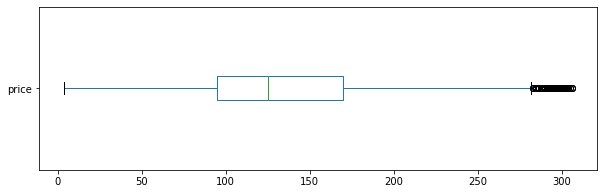

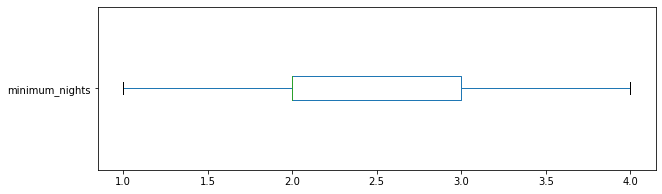

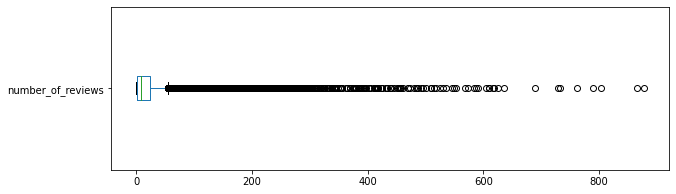

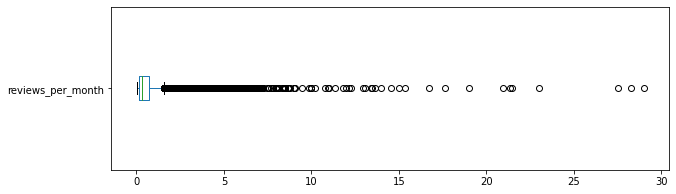

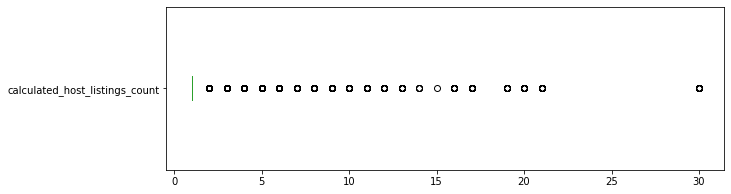

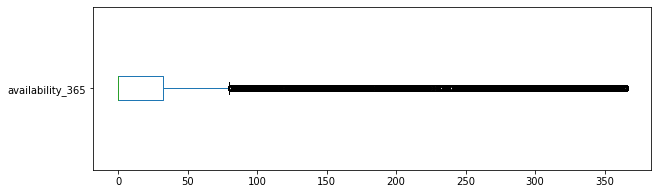

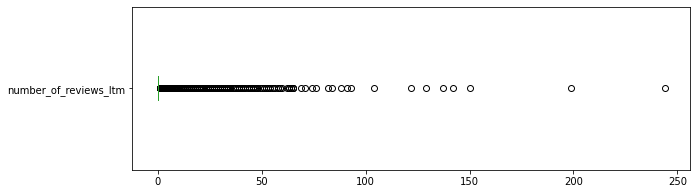

In [17]:
#boxplots após o tratamento dos outliers.

for c in column_values:
    df_clean_full[c].plot(kind="box", vert=False, figsize=(10, 3));
    plt.show()

In [18]:
#análise de estatística descritiva, após o tratamento dos outliers.

df_clean_full[column_values].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,13202.000000,13202.000000,13202.000000,13202.000000,13202.000000,13202.000000,13202.000000
mean,136.476140,2.288290,26.815558,0.700089,1.628693,51.686184,1.488865
std,58.270863,0.883862,60.656158,1.278315,2.419992,104.537092,6.723983
min,4.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,95.000000,2.000000,2.000000,0.130000,1.000000,0.000000,0.000000
50%,125.000000,2.000000,8.000000,0.340000,1.000000,0.000000,0.000000
75%,170.000000,3.000000,23.000000,0.700089,1.000000,32.000000,0.000000
max,306.000000,4.000000,877.000000,29.000000,30.000000,365.000000,244.000000


### **Q6. Qual a correlação existente entre as variáveis?**

Pela matriz de correlação:

* Se tratando da variável *price*, não foi apresentado correlações lineares fortes com as demais variáveis.

* Destaca-se uma correlação positiva com a coluna *minimum_nights*, ou seja, quanto maior o número de noites mínimas maior o preço. 

* As variáveis de review apresentaram correlações negativas com o preço, denotando que, quanto maior o número de reviews, mais baixo são os preços das diárias em Amsterdam. Pode-se inferir que, talvez, a população de Amsterdam avalia em maior quantidade as residências quando a experiência de hospedagem é ruim, forçando os preços para baixo. 

* A premissa acima se fortalece quando é apresentado uma correlação positiva entre as variáveis de review e a variável *availability_365*. Ou seja, quanto maior o número de reviews, mais tempo o imóvel fica com dias disponíveis para locação, denotando uma possível queda de demanda por reviews ruins.

In [19]:
# criar uma matriz de correlação.

corr = df_clean_full[column_values].corr()

# mostrar a matriz de correlação.

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.151761,-0.138647,-0.110432,-0.041220,0.062117,-0.064299
minimum_nights,0.151761,1.000000,-0.086991,-0.157531,-0.156743,-0.138039,-0.149496
number_of_reviews,-0.138647,-0.086991,1.000000,0.654803,0.015067,0.290465,0.462521
reviews_per_month,-0.110432,-0.157531,0.654803,1.000000,0.128350,0.323717,0.635617
calculated_host_listings_count,-0.041220,-0.156743,0.015067,0.128350,1.000000,0.210645,0.112135
availability_365,0.062117,-0.138039,0.290465,0.323717,0.210645,1.000000,0.265835
number_of_reviews_ltm,-0.064299,-0.149496,0.462521,0.635617,0.112135,0.265835,1.000000


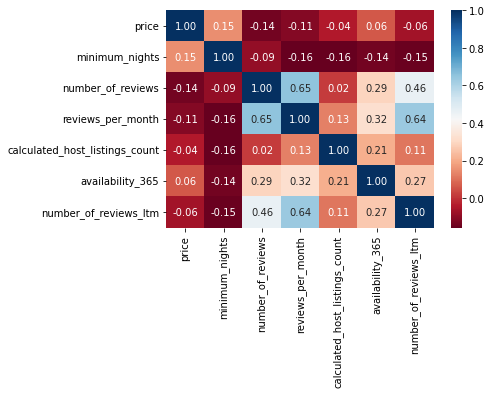

In [20]:
# plotar um heatmap a partir das correlações

ax = sns.heatmap(corr, cmap="RdBu",annot=True, fmt=".2f")

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível.

df_clean_full.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    9892
Private room       3187
Hotel room           86
Shared room          37
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível.

df_clean_full.room_type.value_counts().sort_values(ascending=False)/df_clean_full.shape[0]

Entire home/apt    0.749280
Private room       0.241403
Hotel room         0.006514
Shared room        0.002803
Name: room_type, dtype: float64

### **Q8. Análises sobre o dataset**



In [23]:
# ver preços e disponibilidade por bairros e por número de reviews, na média.

df_clean_full.groupby(by="neighbourhood").agg({"price": "mean", "availability_365": "mean", "number_of_reviews":"mean"}).sort_values(by="price", ascending=False)

,price,availability_365,number_of_reviews
neighbourhood,,,
Centrum-Oost,152.475829,71.429384,42.390521
Centrum-West,150.589147,84.997181,47.723044
De Pijp - Rivierenbuurt,145.882861,41.280518,23.700370
IJburg - Zeeburgereiland,142.638436,60.869707,17.465798
Zuid,141.209227,46.965665,23.062232
Westerpark,139.478474,40.074364,21.742661
Oud-Oost,136.779463,40.087515,19.756126
De Baarsjes - Oud-West,135.811213,38.405169,22.481822
Watergraafsmeer,133.929730,43.213514,18.100000


In [24]:
#relação de oferta x preço

df_l_x_p = df_clean_full.groupby(by="neighbourhood").agg({"price":"mean", "neighbourhood":"count"}).sort_values(by = "price", ascending=False)

df_l_x_p

,price,neighbourhood
neighbourhood,,
Centrum-Oost,152.475829,1055
Centrum-West,150.589147,1419
De Pijp - Rivierenbuurt,145.882861,1622
IJburg - Zeeburgereiland,142.638436,307
Zuid,141.209227,932
Westerpark,139.478474,1022
Oud-Oost,136.779463,857
De Baarsjes - Oud-West,135.811213,2283
Watergraafsmeer,133.929730,370


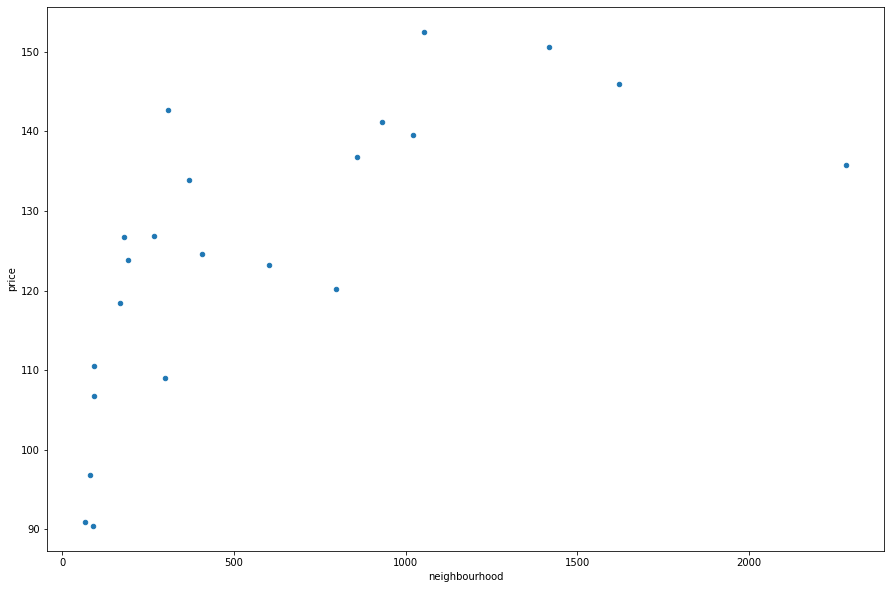

In [25]:
df_l_x_p.plot(kind="scatter", y = "price", x = "neighbourhood", figsize=(15, 10));

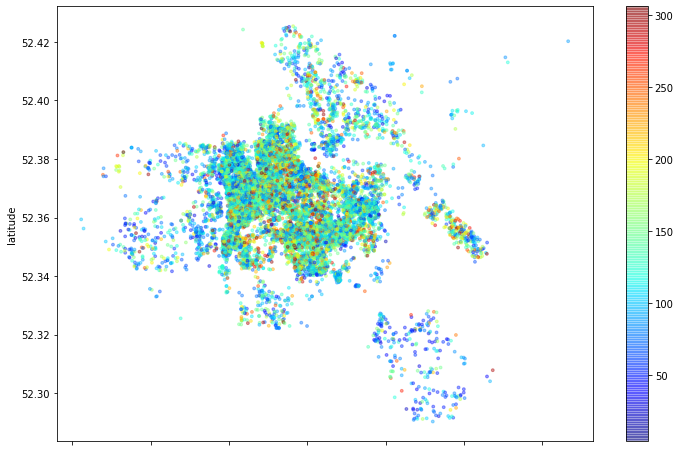

In [26]:
# plotar os imóveis pela latitude-longitude

df_clean_full.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean_full['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


* A princípio, percebe-se correlações fracas da variável *price* com as demais variáveis de tipos numéricos do dataframe. Destaca-se uma correlação positiva com a coluna *minimum_nights* e correlações negativas com as variáveis de review. Primeiramente, foi inferido que, possivelmente, a população de Amsterdam avalia em maior quantidade as residências quando a experiência de hospedagem é ruim, forçando os preços para baixo. 

* Como já dito anteriormente, a premissa acima parecia se fortalecer ao ser apresentada uma correlação positiva entre as variáveis de review e a variável *availability_365*. Ou seja, quanto maior o número de reviews mais tempo o imóvel fica com dias disponíveis para locação, denotando uma possível queda de demanda por reviews ruins. No entanto, ao analisar a relação entre preço X disponibilidade X reviews por bairro, essa relação não fica tão clara.

* Já as análises por variáveis categóricas denotam que existe uma preferência da população de Amsterdam por imóveis do tipo *Entire home/apt* e *Private room*. A média de preço das diárias são maiores nas regiões centrais da cidade, sendo condizente com o que é esperado da relação "preço X localidade". 

* É possível verificar, também, que a disponibilidade dos imóveis não está sempre relacionada a preços mais caros ou à localidade. Existem lugares baratos com uma alta média de disponibilidade dos imóveis.

* A relação de oferta de imóveis por bairro X preço aparenta, curiosamente, mostrar uma relação linear positiva. Portanto, os preços caros parecem estar mais ligados à boa localidade do que a quantidade ofertada (sendo esperado uma relação linear negativa entre preço X oferta).

* Essas informações permitem concluir que, possivelmente, exista uma correlação forte entre essas variáveis categóricas, de localidade e tipo de imóvel, com o  preço das diárias, podendo-se tomar decisões sobre a relação entre elas.


